In [2]:
from sklearn.datasets import make_blobs  # for making datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  # for visualization
import numpy as np  # for computation
import random  # for random initialization
import time
from IPython.display import clear_output
import cv2

In [3]:
K = 4
X, y = make_blobs(n_samples=1000, n_features=2, centers=K, random_state=32)

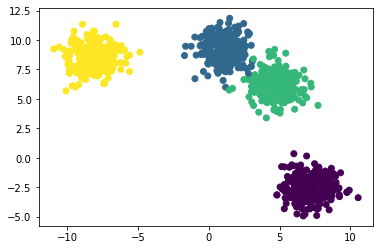

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
def init_centroids(X, K):
  rand_indexes = random.choices(range(1000), k=4)
  centroids = X[rand_indexes, :]
  print(rand_indexes)
  return centroids

In [6]:
# for evaluation, we use fixed centroids instead of randomly initialized centroids
fixed_init_centroids = X[[0, 250, 500, 750] , :]

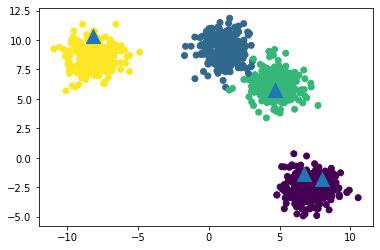

In [7]:
def visualize(X, y, centroids):
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200)
  plt.show();
visualize(X, y, fixed_init_centroids)

In [8]:
dp1 = X[0]
dp2 = X[1]

# write your code below
# you can use  np.linalg.norm
distance = np.linalg.norm(dp1 - dp2)
print(distance)

# eval
assert distance == 0.8347885963011235, "Your answer is not correct"

0.8347885963011235


In [10]:
# write a function to calculate distance between data points to centroids
def data_centroid_distance(X, centroids):
  distance = np.zeros((X.shape[0], centroids.shape[0])) # in which distance[i, j] is the distance between X[i] and centroids[j]
  # write your code below
  for i, centroid in enumerate(centroids):
     distance[:, i] = np.sqrt(np.sum(np.square(X - centroid), axis=1))
  return distance
#y = np.argmin(distance, axis=1)
#new_y = data_centroid_distance(X, fixed_init_centroids)
#visualize(X, new_y, fixed_init_centroids)
 # return y
# evaluate
distance = data_centroid_distance(X, fixed_init_centroids)
assert distance[0, 0] == 0 and distance[250, 1] == 0 and distance[500, 2] == 0 and distance[750, 3] == 0, "Your answer is not correct"

In [ ]:
# write a function which assigns data points to clusters
def assign_clusters(X, centroids):
  y = np.zeros((X.shape[0]))
  distance = data_centroid_distance(X, centroids)
  # write your code below
  assigned_y = np.argmin(distance, axis=1)
  return assigned_y

# evaluate
assigned_y = assign_clusters(X, fixed_init_centroids)
assert assigned_y[0] == 0 and assigned_y[250] == 1 and assigned_y[500] == 2 and assigned_y[750] == 3, "Your answer is not correct"
visualize(X, assigned_y, fixed_init_centroids)  # check visually to see if the results are reasonable

In [12]:
def recalculate_centroids(X, y, K):
  centroids = np.zeros((K, X.shape[1]))
  # write your code below
  for i in range(K):
    centroids[i, :]= np.average(X[y==i, :], axis=0)
  return centroids
  new_centroids = recalculate_centroids(X, new_y, K)
  visualize(X, new_y, new_centroids)

In [ ]:
from numpy.random.mtrand import rand
def kmeans(X, K, max_iter=100):
  x_centroids = random.choices(range(150),k = 4)
  centroids = X[x_centroids, :]
  print(x_centroids)
          # write your code here , centroids should be initialized randomly
  for i in range(max_iter):
    y = assign_clusters(X, centroids)               # write your code here
    new_centroids = recalculate_centroids(X, y, K)           # write your code here
    clear_output()
    print(f'Step: {i}')
    visualize(X, y, centroids)
    time.sleep(1)
    if np.array_equal(centroids, new_centroids):
      break
    centroids = new_centroids

# evaluate
kmeans(X, K)

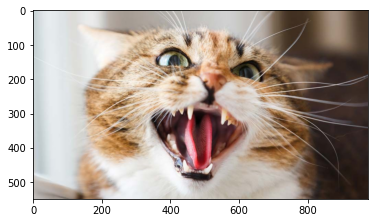

In [16]:
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/41CF/production/_109474861_angrycat-index-getty3-3.jpg -O cat.jpg -q # download image 
original_img = cv2.imread("cat.jpg")[:, :, ::-1]
plt.imshow(original_img)

In [ ]:
def compress_image(original_img, n_colors=16):
  img = np.reshape(original_img, (-1, 3))
  kmeans = KMeans(n_clusters=n_colors, n_init=1)
  kmeans.fit(img)
  compressed_img = kmeans.cluster_centers_[kmeans.labels_] # write your code here
  compressed_img = np.reshape(compressed_img, original_img.shape).astype('uint8')
  plt.imshow(compressed_img)

# evaluate
compress_image(original_img, n_colors=2)

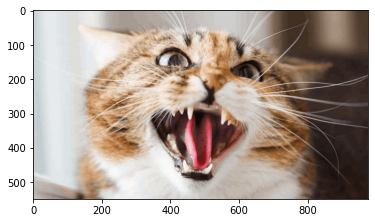

In [18]:
compress_image(original_img, n_colors=128)

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [20]:
data = load_iris()
X = data.data
y = data.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

In [22]:
def KNN_predict(X_train, y_train, x_test, K):
  '''
  Evaluate the classification for `x_test` with K-nearest 
  neighbor given training set (X_train, y_train).
    
  Input:
    X_train: features of training set
    y_train: labels of training set
    x_test : features of test data point
    K      : number of nearest neighbors
  Output:
    Classification of the input data point.
  '''
  # write your code below
  distance = np.sqrt(np.sum(np.square(X_train - X_test),axis = 1)) 
  neighbors = y[np.argpartition(distance, K)[:K]]
  value , count = np.unique(neighbors, return_counts=True)
  prediction = value[np.argmax(count)]
  return prediction

# y_scratch_predict = np.zeros(y_test.shape)
# for i, x_test in enumerate(X_test):
#   y_scratch_predict[i] = KNN_predict(X_train, y_train, x_test, 3)
# cls = KNeighborsClassifier(n_neighbors=3, weights='uniform')
# cls.fit(X_train, y_train)
# y_sklearn_pred = cls.predict(X_test)
# match = accuracy_score(y_scratch_predict, y_sklearn_pred)
# assert match == 1.0, 'Your answer is not correct'

In [23]:
# write your code below
K = 14
weights = "uniform"

cls = KNeighborsClassifier(n_neighbors=K, weights=weights)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

assert acc == 1.0, 'Your answer is not correct'

Accuracy:  1.0
